# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Project Objectives

Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing, modeling, and model evaluation), findings, and key takeaways in a Jupyter Notebook Final Report.

Create modules (wrangle.py) that make your process repeateable and your report (notebook) easier to read and follow.

Ask exploratory questions of your data that will help you understand more about the attributes and drivers of home value. Answer questions through charts and statistical tests.

Construct an timeseries model that predict temp change or future temperature from Greenland.

Make recommendations to a data science team about how to improve predictions.

Be prepared to answer panel questions about your code, process, findings and key takeaways, and model.


# Business Goals:

My goal is to find key driver for temperature change in Greenland

Construct an time series model that predict temperature change or future temp from Greenland.

Deliver a report that the data science team can read through and replicate, understand what steps were taken, why and what the outcome was.

Make recommendations on what works or doesn't work in prediction temperature in Greenland.


# Questions:

• Can we predict the future temperature of greenland??

• Whats the highest temperature greenland had??

• Greenland mean temperature??


# Steps:
1-Data acquistion 

2-Preparation

3-Exploratory data analysis 

4-Modeling 

5-Model evaluation

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

In [35]:
import os
import json
from typing import Dict, List, Optional, Union, cast
from IPython.display import display
from ipywidgets import IntProgress
import requests
import pandas as pd
from bs4 import BeautifulSoup
import acquire
import time
from requests import get
from env import github_token, github_username
import matplotlib.pyplot as plt
import seaborn as sns 
import prepare
import numpy as np
import acquire
import Modeling
import unicodedata
import re
import json
from wordcloud import WordCloud

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import acquire

# 1)Acquire:

In [2]:
#take a while to acquire new repo everytime from github
df=acquire.csv_git()

# Acquire takeaways:

- 

- 

- 

# 2)Prepare/split:

In [3]:
df=prepare.prepare_df(df)

In [4]:
#split the data into train,val,test
train,val,test=prepare.train_validate_test_split(df, 'clean_lang')
train.shape,val.shape,test.shape

((289, 13), (124, 13), (104, 13))

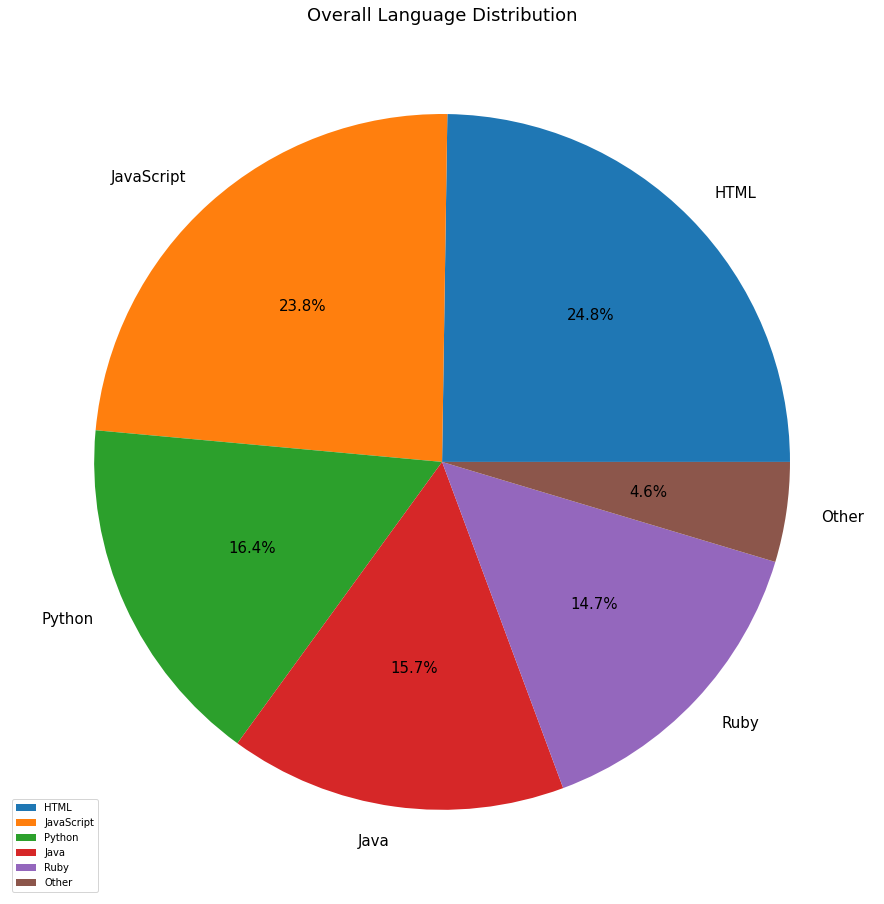

In [5]:
Modeling.pie_chart1(df)

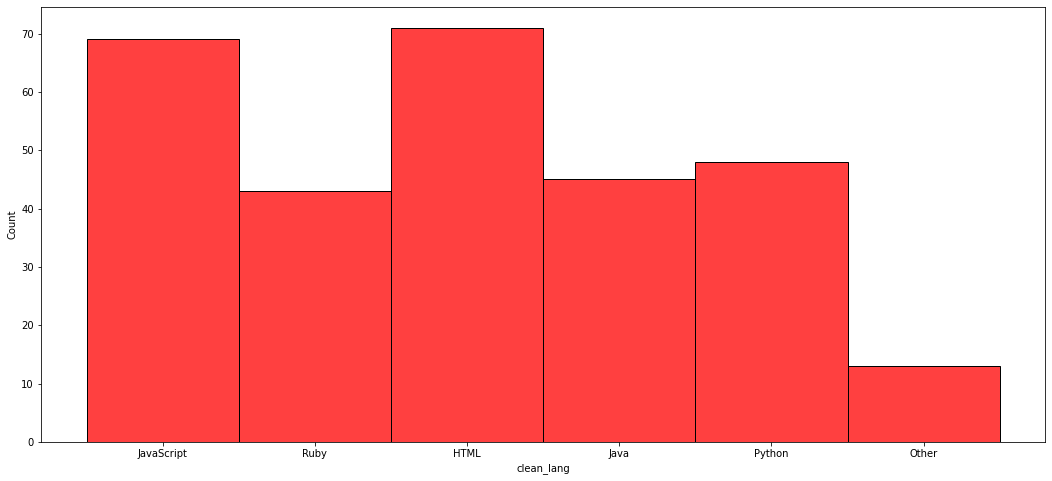

In [6]:
Modeling.pie_chart(train)

# Prepare/split takeaways:

-  Test is 20% of the original dataset, validate is .30*.80= 24% of the original dataset, and train is .70*.80= 56% of the original dataset

- Prepared the data by creating columns 

- 

# Dictianary 
|Attribute|Old keys|        Data type   |       Definition   |
| -------- |-------- | -------- | -------- | 
|repo |repo|object |  temp|
|readme_contents |readme_contents|object |temp
|clean|N/A|object | location |
|stemmed |N/A|object|split into years 
|lemmatized |N/A|object |temp/usa method |
|count_set_lem |N/A |int |temp/usa method|
|clean_lang |N/A |object |date|

# 3)Exploration:

# Hypotheses:

`Hypotheses-1:`

does the amout of unique words vary by language?
.unique() applied to each (not very smart)

`Hypotheses-2:`

does the most common words vary by language

`Hypotheses-3:`

does the length of the repo readme (word amount) vary by language

`Hypotheses-4:`

is the most common words in a readme related to the top 95% of words most common to a language for a majority (boolean class)

`Hypotheses-5:`

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses-1:`

Does the amout of unique words vary by language?.unique() applied to each (not very smart)

count_set_lem <-target | clean_lang <-population name | JavaScript <-sample name
We fail to reject the null hypothesis ( JavaScript as a sample has equal mean values to clean_lang as a population regarding Non-Repeating Words ) t=-0.00911, p=0.99275
----------
count_set_lem <-target | clean_lang <-population name | Python <-sample name
We reject the null Hypothesis ( P̶y̶t̶h̶o̶n̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶e̶a̶n̶_̶l̶a̶n̶g̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶N̶o̶n̶-̶R̶e̶p̶e̶a̶t̶i̶n̶g̶ ̶W̶o̶r̶d̶s̶ ) t=3.18761, p=0.00202
----------
count_set_lem <-target | clean_lang <-population name | Java <-sample name
We fail to reject the null hypothesis ( Java as a sample has equal mean values to clean_lang as a population regarding Non-Repeating Words ) t=-0.13121, p=0.89594
----------
count_set_lem <-target | clean_lang <-population name | HTML <-sample name
We reject the null Hypothesis ( H̶T̶M̶L̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s

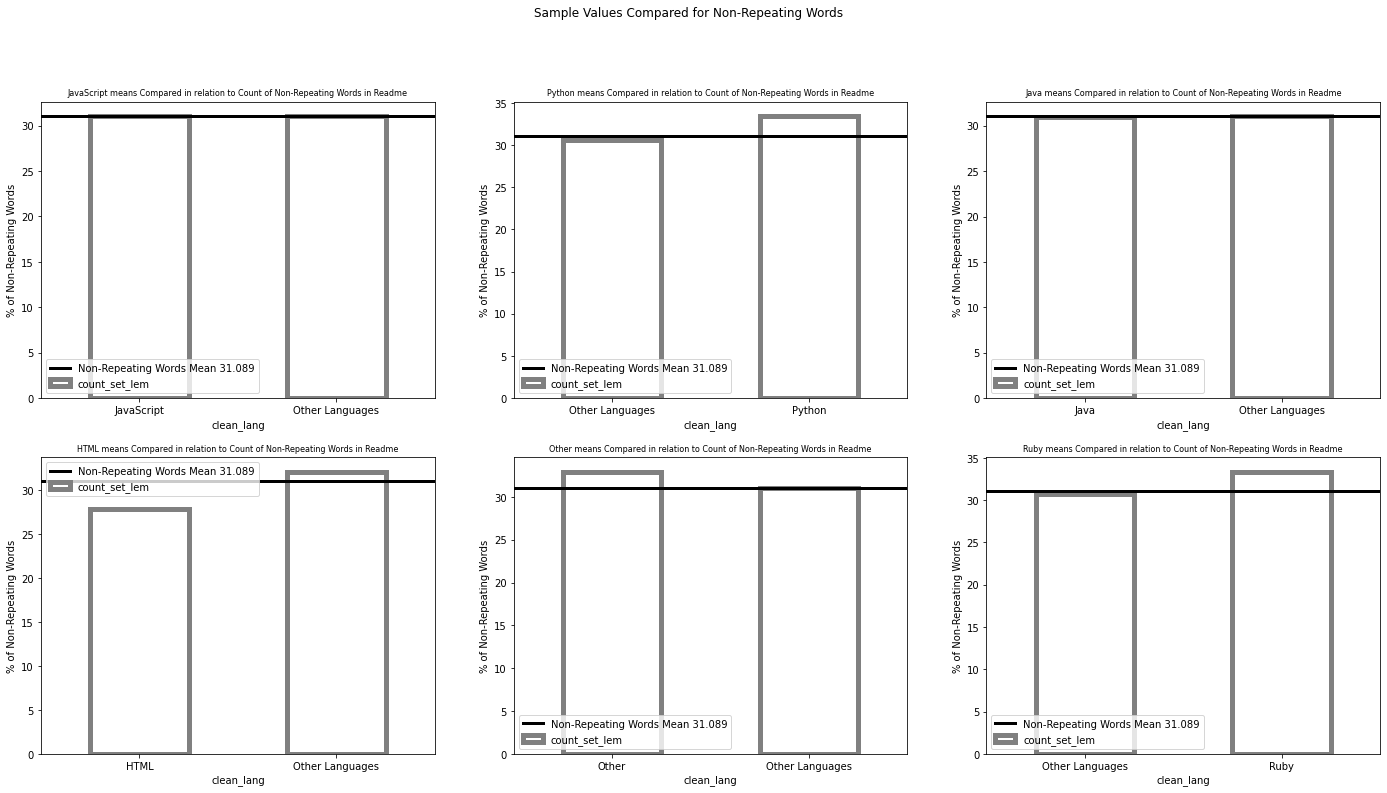

The ones that are similar in value -> ('JavaScript', 'Java', 'Other') 
The ones not similar in value -> ('Python', 'HTML', 'Ruby')


In [7]:
Modeling.explore_ttest_lang_setcount(df)

# Takeaways:
- 
- 
- 


# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses-2:`

does the most common words vary by language

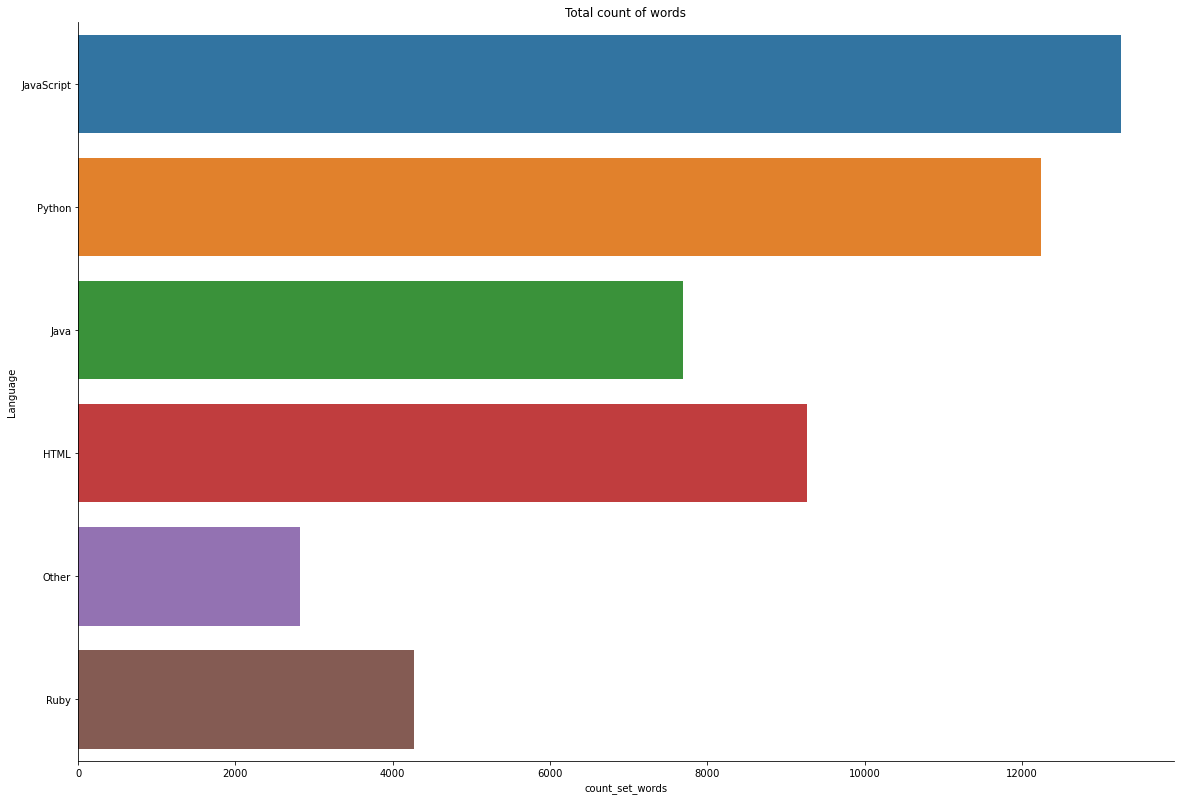

0    13266
1    12245
2     7695
3     9266
4     2817
5     4276
Name: count_set_words, dtype: int64


In [8]:
Modeling.graph2(df)

In [9]:
#stats test


# Takeaways:
- 
- 
- 

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses-3:`

does the length of the repo readme (word amount) vary by language

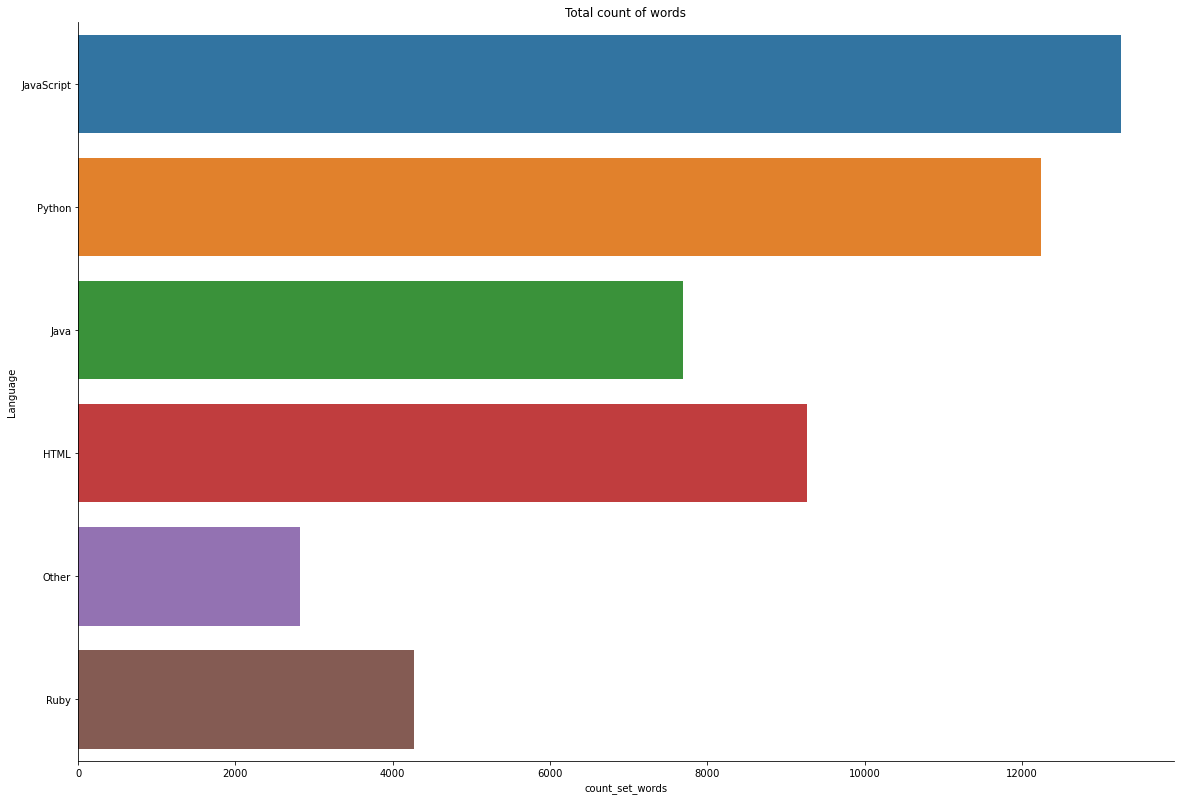

0    13266
1    12245
2     7695
3     9266
4     2817
5     4276
Name: count_set_words, dtype: int64


In [10]:
Modeling.graph2(df)

In [11]:
#stats test:

# Takeaways:
- 
- 
-  


# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses-4:`

is the most common words in a readme related to the top 95% of words most common to a language for a majority (boolean class)

In [39]:
java = ' '.join(train[train.clean_lang == 'Java'].lemmatized)

In [42]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(java, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head()


(e,  )    2384
(i, n)    1862
(e, r)    1689
(o, n)    1615
(r, e)    1570
dtype: int64

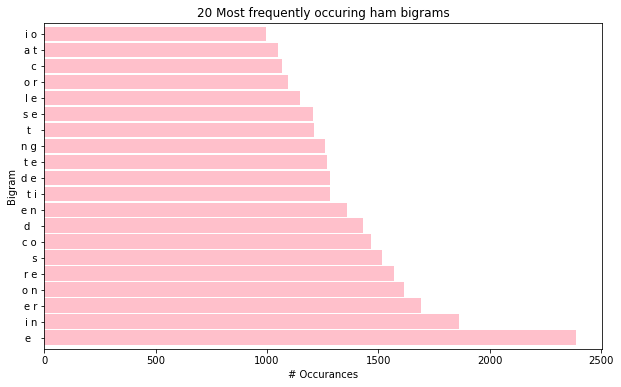

In [43]:
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


In [30]:
lang

,Language,Words,most_common,count_set_words
0,JavaScript,"[do180apps, do180, repository, sample, applica...","[td, react, native, &#9;, javascript]",13266
1,Python,"[jupyter, leer, en, otros, idiomas, englishrea...","[object, detection, code, python, file]",12245
2,Java,"[java, starshttpsimgshieldsiogithubstarsdoocsa...","[java, 1, use, support, project]",7695
3,HTML,"[simplefolio, githubhttpsimgshieldsiogithublic...","[free, project, user, file, code]",9266
4,Other,"[welcome, smartthings, public, github, repo, r...","[python, list, code, project, element]",2817
5,Ruby,"[homebrew, github, releasehttpsimgshieldsiogit...","[method, test, code, file, ruby]",4276


In [31]:
df.head()

,repo,readme_contents,clean,stemmed,lemmatized,count_set_lem,clean_lang,count_most_common_JavaScript,count_most_common_Python,count_most_common_Java,count_most_common_HTML,count_most_common_Other,count_most_common_Ruby
0,RedHatTraining/DO180-apps,# DO180-apps\nDO180 Repository for Sample Appl...,do180apps do180 repository sample applications,do180app do180 repositori sampl applic,do180apps do180 repository sample application,18,JavaScript,0,0,0,0,0,0
1,udacity/frontend-nanodegree-resume,# Project Details\n## How do I complete this p...,project details complete project review online...,project detail complet project review onlin re...,project detail complete project review online ...,38,JavaScript,15,34,16,26,24,15
2,RedHatTraining/DO288-apps,# DO288 Containerized Example Applications\n\n...,do288 containerized example applications repos...,do288 container exampl applic repositori conta...,do288 containerized example application reposi...,25,JavaScript,0,0,0,0,0,0
3,jhu-ep-coursera/fullstack-course4,"# Coursera: HTML, CSS and Javascript for Web D...",coursera html css javascript web developers ex...,coursera html css javascript web develop examp...,coursera html cs javascript web developer exam...,28,JavaScript,2,2,0,2,2,2
4,bettiolo/node-echo,"node-echo\n=========\n\nnode.js echo server, r...",nodeecho nodejs echo server returns request da...,nodeecho nodej echo server return request data...,nodeecho nodejs echo server return request dat...,16,JavaScript,0,0,0,0,0,0


In [17]:
lang_dict={"Language":[],"Words":[]}
for lang in df["clean_lang"].unique():
    lang_dict["Language"].append(lang)
    lang_dict["Words"].append((" ".join(df[df["clean_lang"]==lang]["lemmatized"])).replace("'","").split())
lang = pd.DataFrame(lang_dict)
most_common_list=[]
for i,each in enumerate(lang["Language"].unique()):
    looped_series = pd.Series(lang["Words"].loc[i]).value_counts()
    most_common = looped_series[looped_series > looped_series.quantile(.95)]
    most_common_list.append(most_common[:5].index.tolist())
lang["most_common"] = pd.Series(most_common_list)
lang["count_set_words"] = lang["Words"].apply(set).apply(len)

In [28]:
python_cloud = WordCloud(background_color='white', height=1000, width=500).generate(' '.join(python_words))
javascript_cloud = WordCloud(background_color='pink', height=600, width=800).generate(' '.join(javascript_words))
r_cloud = WordCloud(background_color='pink', height=600, width=800).generate(' '.join(r_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(python_cloud)
axs[1].imshow(javascript_cloud)
axs[2].imshow(r_cloud)

axs[0].set_title('Python')
axs[1].set_title('Javascript')
axs[2].set_title('R')

for ax in axs: ax.axis('off')

NameError: name 'WordCloud' is not defined

In [23]:
# Storing frequency into dataframe
go_freq = pd.DataFrame(pd.Series(lang['JavaScript'].split()).value_counts().head(20), columns = ['frequency'])
# Visualize most frequent words for text repos
plt.figure(figsize = (20,8))
plt.xlabel('Words', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("Top 20 Most Common Words for JavaScript", fontsize = 20)
sns.barplot(x=go_freq.index, y=go_freq.frequency, palette ='viridis')

KeyError: 'JavaScript'

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses-5:`

# 4)Modeling:

Use selected features or clustered data to predict the target logerror

Algorithms used:

•KNeighborsClassifier()

•RandomForestClassifier(max_depth=10)

•DecisionTreeClassifier at depth(5)

Best model:

•best model is DecisionTreeClassifier at depth(5)

# Modeling Takeaways:
- 
- 
- 


# 5)Best Model:

• DecisionTreeClassifier perform the best with a f1-score of 90% performing 7 percent better then the baseline.

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Conclusion/Recommnedations/Next Steps:
`Conclusion:`

• We could conclude that Fahrenheit for greenland is very very cold so go live there...

• In conclusion Fahrenheit for Greenland change all seasons but keep the same pathern?

• We could conclude that the Previous year model perform the best with a rmse rate of 30.0

`Recommendations:`

• I recommen that we check if anything happen when the temp got cold if any natural disasters happened.

• We cant change mothernatural but we could predict it at a close percentage. 

`Next Steps:`

• I would love to dive into more country. How different country change in temp. This data has so much potential but i would just be digging myself into a rabbit hole.

# Steps to reproduce finalnotebook:
data set was collected from kaggle(https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)


1)Download the following files 

• Wrangle.py

•'.csv'

• finalnotebook.pynd

2) After downloading files make sure all files are in the same folder or location 

3) Onces step two and step one are done you would be able to run finalnotebook without errors and on your own 